In [13]:
pip install ktrain &> /dev/null

In [1]:
!pip install pytesseract &> /dev/null

  Created wheel for pytesseract: filename=pytesseract-0.3.7-py2.py3-none-any.whl size=13945 sha256=ce1657ef7c79fba489a76f18950b3c80dfb124a794f5042e58dce4bcf95e2c63
  Stored in directory: /root/.cache/pip/wheels/81/20/7e/1dd0daad1575d5260916bb1e9781246430647adaef4b3ca3b3
Successfully built pytesseract


In [2]:
!sudo apt install tesseract-ocr &> /dev/null

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 34 not upgraded.
Need to get 4,795 kB of archives.
After this operation, 15.8 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-eng all 4.00~git24-0e00fe6-1.2 [1,588 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-osd all 4.00~git24-0e00fe6-1.2 [2,989 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr amd64 4.00~git2288-10f4998a-2 [218 kB]
Fetched 4,795 kB in 1s (4,455 kB/s)
debconf: unable to initi

In [14]:
try:
  from PIL import Image
except ImportError:
  import Image
import cv2
import pytesseract
import matplotlib.pyplot as plt
import ktrain

In [5]:
!which tesseract

/usr/bin/tesseract


In [6]:
pytesseract.pytesseract.tesseract_cmd = (
    r'/usr/bin/tesseract'
)

In [18]:
drive_path = '/content/drive/MyDrive/NLP/'

In [19]:
image = Image.open(drive_path+'test_images/macgruber.jpeg')

In [20]:
text = pytesseract.image_to_string(image)

In [21]:
print(text)

“THE FUNNIEST SATURDAY NIGHT LIVE FILM
SINGE WAYNE’S WORLD”

“THE BEST AGCTION-COMEDY SINCE BEVERLY HILLS COP.”

qe] US, AND VERY, VERY FUNNY.”
Doo

rlelElrblly fag ae
rrr

 



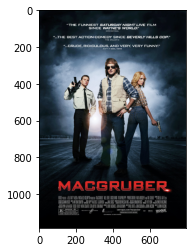

In [22]:
plt.imshow(image)
plt.show()

Okay great.  Not perfect, but should be enough to get a sentiment analysis.  Let's try it.

In [15]:
# Use ktrain to reload the predictor from the other notebook
predictor = ktrain.load_predictor('/content/drive/MyDrive/NLP/movie_predictor')

In [23]:
# Set up some modular code to efficiently test multiple images and various predictors
def make_prediction(predictor, text):
  prediction = predictor.predict(text)
  return prediction

def run_ocr(img_path):
  image = Image.open(img_path)
  text = pytesseract.image_to_string(image)
  plt.imshow(image)
  plt.show()
  return text

def ocr_sentiment_predictor(predictor, images):
  for img in images:
    text = run_ocr(img)
    print(f'Extracted Text: \n{text}\n')
    prediction = make_prediction(predictor,text)
    print(f'Sentiment Prediction: {prediction}\n')

In [24]:
test_path1 = drive_path+'test_images/avatar.jpeg'
test_path2 = drive_path+'test_images/macgruber.jpeg'
images = [test_path1, test_path2]

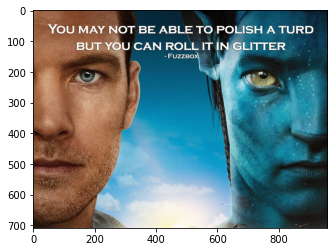

Extracted Text: 
Nor MAY NOT BE ABLE TO POLISH A TURD
U CAN tele. ny I

   


Sentiment Prediction: neg



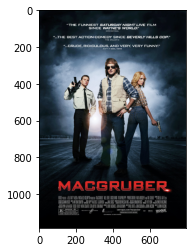

Extracted Text: 
“THE FUNNIEST SATURDAY NIGHT LIVE FILM
SINGE WAYNE’S WORLD”

“THE BEST AGCTION-COMEDY SINCE BEVERLY HILLS COP.”

qe] US, AND VERY, VERY FUNNY.”
Doo

rlelElrblly fag ae
rrr

 


Sentiment Prediction: pos



In [25]:
# NOTE - these reviews are not my own :) 
ocr_sentiment_predictor(predictor, images)